#### Import libraries & data

In [1]:
import numpy as np
import pandas as pd
pd.set_option("max_r", 100)
pd.get_option("display.max_rows")
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
ca_projects = pd.read_csv('data/CA_projects.csv')

## Overview:

In [3]:
ca_projects.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_name,school_metro_type,school_percentage_free_lunch,school_state
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5,2017-07-31 20:36:03,Missouri,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,Girls Academic Leadership Academy,unknown,75.0,California
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28,2017-07-31 15:16:02,California,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,Girls Academic Leadership Academy,unknown,75.0,California
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51,2017-08-01 12:38:47,Massachusetts,No,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,Girls Academic Leadership Academy,unknown,75.0,California


In [4]:
ca_projects.shape

(4304201, 29)

In [5]:
ca_projects.drop(['school_state','school_name'], axis=1, inplace=True) # we know they're all in California, because I've specifically filtered it for California. School name is irrelevant.

In [6]:
ca_projects.describe()

,donation_amount,donor_cart_sequence,teacher_project_posted_sequence,project_cost,resource_quantity,resource_unit_price,school_percentage_free_lunch
count,4.304201e+06,4.304201e+06,4.304201e+06,4.304201e+06,4.273411e+06,4.273360e+06,4.289214e+06
mean,6.997510e+01,2.365796e+02,1.724172e+01,1.005227e+03,3.097941e+00,5.687945e+01,6.426173e+01
std,2.003366e+02,1.468436e+03,3.701087e+01,2.531021e+03,1.039398e+01,2.037840e+02,2.691288e+01
min,1.000000e-02,1.000000e+00,1.000000e+00,9.358000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+01,1.000000e+00,1.000000e+00,4.446600e+02,1.000000e+00,6.760000e+00,4.600000e+01
50%,2.700000e+01,2.000000e+00,4.000000e+00,6.515400e+02,1.000000e+00,1.299000e+01,7.300000e+01
75%,6.000000e+01,1.200000e+01,1.200000e+01,1.057220e+03,2.000000e+00,3.399000e+01,8.700000e+01
max,2.500000e+04,1.811600e+04,4.260000e+02,1.597115e+05,1.807000e+03,2.839999e+04,9.900000e+01


In [7]:
null_cols = ca_projects.isnull().sum()
null_cols[null_cols > 0]

project_title                          60
project_subject_category_tree          20
project_subject_subcategory_tree       20
project_resource_category              28
resource_item_name                    465
resource_quantity                   30790
resource_unit_price                 30841
resource_vendor_name                95988
teacher_prefix                         68
school_percentage_free_lunch        14987
dtype: int64

## 1. Cleaning:

### 1.1 Null rows subject category and subcategory:

First the subject categories and subcategories: these are probably the same ones, as in the first look notebook.

In [8]:
#these probably correspond same as the first notebook:
subject_categories = ca_projects[(ca_projects['project_subject_category_tree'].isnull()) & (ca_projects['project_subject_subcategory_tree'].isnull())]
print(len(subject_categories))
#So the missing values here are the same ones. 
subject_categories['project_current_status'].value_counts()
#these rows can be dropped

20


Fully Funded    20
Name: project_current_status, dtype: int64

In [9]:
print(subject_categories['project_resource_category'].unique()) # this also deals with 20 of the 28 NaN values in this column
print(len(subject_categories['project_id'].unique())) # how many projects are contained in those 20?

[nan]
2


In [10]:
#So this concerns two fully funded projects, with missing categories.
print(subject_categories['project_title'].unique())
print(subject_categories['resource_item_name'].unique()) 

['Technology= The Pen And Paper Of Our Time'
 'MLK Had A Dream, And So Do We!']
['apple - ipad with retina display wi-fi - 64gb - white'
 'apple - smart case for apple ipad 2nd-, 3rd- and 4th-generation - green'
 "apple&#174; macbook&#174; pro&#174; - 13.3' - core i5 - os x 10.8 mountain lion - 4 gb ram - 500 gb hdd"]


In [11]:
ca_projects = ca_projects.dropna(subset=['project_subject_category_tree','project_resource_category'])

### 1.2 Column Project Subject Category:

In [12]:
project_categories = ca_projects['project_subject_category_tree'].unique() 
print(len(project_categories)) 
project_cat = list(project_categories)
new_list = [x for xs in project_cat for x in xs.split(',')]
print(new_list)

50
['Math & Science', 'Health & Sports', 'Math & Science', ' Applied Learning', 'Math & Science', ' Health & Sports', 'Health & Sports', ' Math & Science', 'Literacy & Language', ' Math & Science', 'Warmth', ' Care & Hunger', 'Applied Learning', 'History & Civics', 'Literacy & Language', 'Health & Sports', ' Literacy & Language', 'Applied Learning', ' Math & Science', 'Literacy & Language', ' Music & The Arts', 'Math & Science', ' Music & The Arts', 'Applied Learning', ' Literacy & Language', 'Math & Science', ' Literacy & Language', 'Literacy & Language', ' Special Needs', 'Math & Science', ' Special Needs', 'Music & The Arts', 'Applied Learning', ' Special Needs', 'Applied Learning', ' Music & The Arts', 'Math & Science', ' History & Civics', 'Special Needs', ' Music & The Arts', 'Literacy & Language', ' Applied Learning', 'History & Civics', ' Literacy & Language', 'History & Civics', ' Music & The Arts', 'History & Civics', ' Special Needs', 'Literacy & Language', ' History & Civic

50 Project Subject Categories is too many variables for model, but a project can have two categories. If I split these values into the individual unique category types, we are left with less. 

In [13]:
new_list = set(new_list)
new_lst = list(new_list)
print(new_lst) #some trailing whitespaces to deal with, but this is looking better

[' Care & Hunger', 'Health & Sports', ' Special Needs', ' Math & Science', ' Music & The Arts', ' Literacy & Language', 'Applied Learning', 'Music & The Arts', ' Warmth', 'Literacy & Language', 'Warmth', ' Health & Sports', 'History & Civics', 'Math & Science', ' History & Civics', 'Special Needs', ' Applied Learning']


In [14]:
categories = [cat.strip() for cat in new_lst]
project_cat = list(dict.fromkeys(categories))
print(project_cat)
print(len(project_cat)) #lots better.

['Care & Hunger', 'Health & Sports', 'Special Needs', 'Math & Science', 'Music & The Arts', 'Literacy & Language', 'Applied Learning', 'Warmth', 'History & Civics']
9


In [15]:
for newcol in project_cat:
    ca_projects[newcol]=0

In [16]:
ca_projects.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,Care & Hunger,Health & Sports,Special Needs,Math & Science,Music & The Arts,Literacy & Language,Applied Learning,Warmth,History & Civics
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5,2017-07-31 20:36:03,Missouri,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,0,0,0,0,0,0
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28,2017-07-31 15:16:02,California,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,0,0,0,0,0,0
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51,2017-08-01 12:38:47,Massachusetts,No,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,0,0,0,0,0,0


In [17]:
ca_projects.columns = ca_projects.columns.str.lower().str.replace(' & ', '_').str.replace(' ', '_')
ca_projects.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5,2017-07-31 20:36:03,Missouri,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,0,0,0,0,0,0
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28,2017-07-31 15:16:02,California,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,0,0,0,0,0,0
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51,2017-08-01 12:38:47,Massachusetts,No,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,0,0,0,0,0,0


In [18]:
#test:
ca_projects['math_science'] = np.where(ca_projects.project_subject_category_tree.str.contains('Math & Science'), 1,0)                                       
ca_projects.head(3) # cool                             

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5,2017-07-31 20:36:03,Missouri,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28,2017-07-31 15:16:02,California,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51,2017-08-01 12:38:47,Massachusetts,No,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0


In [19]:
ca_projects['music_the_arts'] = np.where(ca_projects.project_subject_category_tree.str.contains('Music & The Arts'), 1,0)                                       
ca_projects['history_civics'] = np.where(ca_projects.project_subject_category_tree.str.contains('History & Civics'), 1,0)                                       
ca_projects['warmth'] = np.where(ca_projects.project_subject_category_tree.str.contains('Warmth'), 1,0)                                       
ca_projects['care_hunger'] = np.where(ca_projects.project_subject_category_tree.str.contains('Care & Hunger'), 1,0)                                       
ca_projects['applied_learning'] = np.where(ca_projects.project_subject_category_tree.str.contains('Applied Learning'), 1,0)                                       
ca_projects['health_sports'] = np.where(ca_projects.project_subject_category_tree.str.contains('Health & Sports'), 1,0)                                       
ca_projects['literacy_language'] = np.where(ca_projects.project_subject_category_tree.str.contains('Literacy & Language'), 1,0)                                       
ca_projects['special_needs'] = np.where(ca_projects.project_subject_category_tree.str.contains('Special Needs'), 1,0)                                       


In [20]:
len(ca_projects['project_subject_subcategory_tree'].unique()) #407 unique subcategories. I'm not touching that.
# will drop project_subject_category_tree, project_subject_subcategory_tree and project title later, as these might still help me fill some nan values down the line 

407

### 1.3 Project Resource Category:

In [21]:
print(len(ca_projects['project_resource_category'].unique())) #that can work
print(ca_projects['project_resource_category'].unique())

17
['Supplies' 'Technology' 'Sports & Exercise Equipment' 'Flexible Seating'
 'Classroom Basics' 'Art Supplies' 'Lab Equipment'
 'Food, Clothing & Hygiene' 'Reading Nooks, Desks & Storage'
 'Instructional Technology' 'Books' 'Other' 'Trips' 'Visitors'
 'Computers & Tablets' 'Educational Kits & Games' 'Musical Instruments']


#### Create copy of dataframe to see difference between k-1 and no drop_first dummies:

In [22]:
ca_projects_copy = ca_projects.copy()

In [23]:
resource_dummies = pd.get_dummies(ca_projects['project_resource_category'])
resource_dummies.columns = resource_dummies.columns.str.lower().str.replace(' & ', '_').str.replace(' ', '_')
ca_projects = pd.concat([ca_projects, resource_dummies], axis=1)
ca_projects.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5,2017-07-31 20:36:03,Missouri,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28,2017-07-31 15:16:02,California,Yes,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51,2017-08-01 12:38:47,Massachusetts,No,1,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
resources_array = ca_projects_copy['project_resource_category'].to_numpy()

In [25]:
resource_dummies2 = pd.get_dummies(pd.Series(resources_array), drop_first=True, dtype=int)

In [26]:
resource_dummies2.head(3)

,Books,Classroom Basics,Computers & Tablets,Educational Kits & Games,Flexible Seating,"Food, Clothing & Hygiene",Instructional Technology,Lab Equipment,Musical Instruments,Other,"Reading Nooks, Desks & Storage",Sports & Exercise Equipment,Supplies,Technology,Trips,Visitors
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
ca_projects_copy = pd.concat([ca_projects_copy, resource_dummies2], axis=1)
ca_projects_copy.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,Books,Classroom Basics,Computers & Tablets,Educational Kits & Games,Flexible Seating,"Food, Clothing & Hygiene",Instructional Technology,Lab Equipment,Musical Instruments,Other,"Reading Nooks, Desks & Storage",Sports & Exercise Equipment,Supplies,Technology,Trips,Visitors
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5.0,2017-07-31 20:36:03,Missouri,Yes,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28.0,2017-07-31 15:16:02,California,Yes,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51.0,2017-08-01 12:38:47,Massachusetts,No,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
#test. It kept deleting my df when I did this.
ca_projects_copy2 = ca_projects_copy.copy()

In [29]:
ca_projects_copy2.columns = ca_projects_copy2.columns.str.lower().str.replace(' - ', '_').str.replace(' ', '_')

In [30]:
ca_projects_copy2.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_&_tablets,educational_kits_&_games,flexible_seating,"food,_clothing_&_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_&_storage",sports_&_exercise_equipment,supplies,technology,trips,visitors
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5.0,2017-07-31 20:36:03,Missouri,Yes,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28.0,2017-07-31 15:16:02,California,Yes,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51.0,2017-08-01 12:38:47,Massachusetts,No,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
ca_projects_copy.columns = ca_projects_copy.columns.str.lower().str.replace(' & ', '_').str.replace(' ', '_')
ca_projects_copy.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,resource_vendor_name,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5.0,2017-07-31 20:36:03,Missouri,Yes,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28.0,2017-07-31 15:16:02,California,Yes,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51.0,2017-08-01 12:38:47,Massachusetts,No,1.0,Teacher-Led,Building Girls' Environmental Awareness to Bec...,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,inquiries in science: human influence lab package,1.0,1147.5,Carolina Biological Supply Company,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 1.4 Resource item name & vendors:

In [32]:
#check status:
null_cols = ca_projects.isnull().sum()
null_cols[null_cols > 0]

project_title                      60
resource_item_name                465
resource_quantity               30790
resource_unit_price             30841
resource_vendor_name            95988
teacher_prefix                     68
school_percentage_free_lunch    14987
dtype: int64

In [33]:
print(len(ca_projects['resource_item_name'].unique())) #278289 unique values. Probably interesting if I get to incorporate NLP, but for now: drop.
#dropping later as it might help me fill nan values

278289


In [34]:
print(len(ca_projects['resource_vendor_name'].unique()))
print(ca_projects['resource_vendor_name'].unique()) #Lots of categories and not sure if this is influential.
ca_projects.drop(['resource_vendor_name'], axis=1, inplace=True)

31
['Carolina Biological Supply Company' 'Best Buy Education'
 "DICK'S Sporting Goods" 'Amazon Business' 'Quill.com' 'AKJ Education'
 'CDW-G' 'Staples Advantage' 'Nasco' 'Lakeshore Learning Materials'
 'Frey Scientific' 'Blick Art Materials' "Teachers' School Supply"
 'Grainger' 'Woodwind and Brasswind' nan 'ABC School Supply'
 'School Specialty' 'Kaplan Early Learning Company'
 'Scholastic Classroom Magazines' 'Sargent-Welch' 'TIME for Kids'
 'Sportime' 'Britannica Digital Learning' 'MakerBot' 'Cannon Sports'
 'Childcraft' 'Abilitations' 'Sax Arts & Crafts' "Ward's Science"
 'LEGO Education']


### 1.5 Resource Quantity Null values:

In [35]:
filtered_on_qty = ca_projects.loc[ca_projects['resource_quantity'].isna()]

In [36]:
filtered_on_qty['project_current_status'].value_counts()

Fully Funded    28646
Expired          2038
Live              106
Name: project_current_status, dtype: int64

In [37]:
filtered_on_qty['project_resource_category'].value_counts()

Trips         26844
Visitors       3874
Other            38
Technology       21
Supplies         10
Books             3
Name: project_resource_category, dtype: int64

In [38]:
expired = filtered_on_qty['project_current_status'] == 'Expired'
print(filtered_on_qty[expired]['project_resource_category'].value_counts())
print(filtered_on_qty[expired]['project_subject_subcategory_tree'].value_counts())
print(filtered_on_qty[expired]['project_title'].value_counts())
print(filtered_on_qty[expired]['resource_item_name'].value_counts())

Trips       1842
Visitors     193
Supplies       2
Books          1
Name: project_resource_category, dtype: int64
Environmental Science, Health & Life Science    151
Environmental Science                            88
Applied Sciences, Environmental Science          81
Civics & Government, History & Geography         68
History & Geography, Literature & Writing        56
                                               ... 
Literature & Writing, Special Needs               1
Extracurricular, Health & Wellness                1
College & Career Prep, Performing Arts            1
Character Education, Team Sports                  1
Early Development, Health & Life Science          1
Name: project_subject_subcategory_tree, Length: 142, dtype: int64
We Have a Dream!                                      26
Treaties, Diplomacy, and the Big Apple                25
Fifth Graders Going to Mosaic- Social Justice Camp    23
8th Grade Field Trip to the Museum of Tolerance       22
CA to DC: Last Chanc

In [39]:
filtered_on_qty[expired].head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_quantity,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors
5825,f2e413b14efcaa30e497b067b3aa491b,Yes,10.0,1,2014-09-24 15:26:01,California,No,18,Teacher-Led,Meet the Author Elisa Kleven and Then Start Wr...,Literacy & Language,"Literacy, Literature & Writing",Grades PreK-2,Visitors,1110.00,2014-09-23,2015-02-20,Expired,0000,visitor,NaN,NaN,Mrs.,2011-01-26,suburban,90.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12828,cabd6b77138fcca15f16e895aecf9fcb,Yes,10.0,6,2016-07-05 06:43:17,California,Yes,1,Professional Development,Fuel My Passion to Teach a Child to Read!,Literacy & Language,Literacy,Grades PreK-2,Trips,1342.84,2016-07-04,2016-08-01,Expired,0000,trip,NaN,NaN,Mrs.,2016-07-04,suburban,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12829,cabd6b77138fcca15f16e895aecf9fcb,Yes,500.0,2,2016-07-05 14:38:32,Texas,No,1,Professional Development,Fuel My Passion to Teach a Child to Read!,Literacy & Language,Literacy,Grades PreK-2,Trips,1342.84,2016-07-04,2016-08-01,Expired,0000,trip,NaN,NaN,Mrs.,2016-07-04,suburban,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Decision time: resource quantity and resource unit price Nulls

As I am trying to predict what makes a project successful or not, i.e. how likely it is to get fully funded and not expire, I am hesitant to drop the rows with resource quantity and unit price missing, as there are a substantial amount of Expired entries in there (2038 to be exact). Expired projects are limited as is; the target data is not exactly balanced.

#### Solution:

For Project Resource Category == Trips | Visitors, I will fill the Null values; the fact that these don't have a qty or unit price makes sense, as it concerns a trip and logistics (price for bus/plane/hotel/food/etc.). For **unit price**, I will fill these values with the Project Cost. I will drop the **resource qty**, as filling these with 1 will mess with the data anyway, and I don't think this feature is as important as some of the others.

### 1.6 Resource Unit Price:

In [40]:
filtered_on_price = ca_projects.loc[ca_projects['resource_unit_price'].isna()]
print(filtered_on_price['project_current_status'].value_counts())
print(filtered_on_price['project_resource_category'].value_counts())

Fully Funded    28675
Expired          2060
Live              106
Name: project_current_status, dtype: int64
Trips         26844
Visitors       3874
Other            60
Supplies         31
Technology       22
Books            10
Name: project_resource_category, dtype: int64


In [41]:
ca_projects['resource_unit_price'] = ca_projects.apply(
    lambda row: row['project_cost'] if np.isnan(row['resource_unit_price']) and (row['project_resource_category']=='Trips') else row['resource_unit_price'],
    axis=1
)

#df['unit price'] where df['resource category'] == Trips and where df['unit price'] is NULL, fill df['unit price'] with df['project cost']

In [42]:
ca_projects['resource_unit_price'] = ca_projects.apply(
    lambda row: row['project_cost'] if np.isnan(row['resource_unit_price']) and (row['project_resource_category']=='Visitors') else row['resource_unit_price'],
    axis=1
)


In [43]:
filtered_on_price1 = ca_projects.loc[ca_projects['resource_unit_price'].isna()]
print(filtered_on_price1['project_current_status'].value_counts())
print(filtered_on_price1['project_resource_category'].value_counts())

Fully Funded    98
Expired         25
Name: project_current_status, dtype: int64
Other         60
Supplies      31
Technology    22
Books         10
Name: project_resource_category, dtype: int64


In [44]:
ca_projects.dropna(subset=['resource_unit_price'],inplace=True)

In [45]:
ca_projects.drop(['resource_quantity'], axis=1, inplace=True)

In [46]:
null_cols = ca_projects.isnull().sum()
null_cols[null_cols > 0]

project_title                      60
resource_item_name                395
teacher_prefix                     68
school_percentage_free_lunch    14987
dtype: int64

### 1.7 Teacher Prefix:

In [47]:
filtered_on_tch = ca_projects.loc[ca_projects['teacher_prefix'].isna()]
filtered_on_tch.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors
1567600,3fa2dc9d41df2d234779ac07272e4a34,Yes,25.0,2,2016-11-06 13:10:52,Illinois,No,2,Teacher-Led,1:7 Increasing Tech to Decrease Achievement Gaps,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Grades 3-5,Technology,1221.02,2016-11-05,2017-03-04,Fully Funded,2016-11-08,new apple mmgf2ll/a macbook air 13.3-inch lapt...,903.87,NaN,2014-02-09,urban,62.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1567601,3fa2dc9d41df2d234779ac07272e4a34,Yes,25.0,2,2016-11-06 13:10:52,Illinois,No,2,Teacher-Led,1:7 Increasing Tech to Decrease Achievement Gaps,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Grades 3-5,Technology,1221.02,2016-11-05,2017-03-04,Fully Funded,2016-11-08,"case logic display sleeve laps-113, 13.3-inch,...",7.00,NaN,2014-02-09,urban,62.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1567602,3fa2dc9d41df2d234779ac07272e4a34,Yes,50.0,1,2016-11-06 12:36:48,New Mexico,No,2,Teacher-Led,1:7 Increasing Tech to Decrease Achievement Gaps,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Grades 3-5,Technology,1221.02,2016-11-05,2017-03-04,Fully Funded,2016-11-08,new apple mmgf2ll/a macbook air 13.3-inch lapt...,903.87,NaN,2014-02-09,urban,62.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
print(ca_projects['teacher_prefix'].value_counts())
print(filtered_on_tch['project_type'].value_counts()) #They're teacher led projects, so I'll just fill the Null values with "Teacher"

Ms.        1954812
Mrs.       1771564
Mr.         528988
Teacher      45556
Dr.           2697
Mx.            365
Name: teacher_prefix, dtype: int64
Teacher-Led    68
Name: project_type, dtype: int64


In [49]:
ca_projects["teacher_prefix"].fillna("Teacher", inplace = True)

In [50]:
ca_projects['teacher_gender'] = ca_projects['teacher_prefix'].replace(
    ['Ms.','Mrs.'],
    'female', 
    regex=True
).replace(['Mr.'],'male', regex = True
         ).replace(['Teacher','Dr.','Mx.'],'neutral',regex = True)


In [51]:
print(ca_projects['teacher_gender'].value_counts())

female     3726376
male        528988
neutral      48686
Name: teacher_gender, dtype: int64


### 1.8 School Lunches:

In [52]:
filtered_on_lunch = ca_projects.loc[ca_projects['school_percentage_free_lunch'].isna()]
len(filtered_on_lunch['project_id'].unique())

328

In [53]:
print(filtered_on_lunch['project_current_status'].value_counts()) #it is an important factor, so I don't want to drop the column
print(filtered_on_lunch['school_metro_type'].value_counts())

Fully Funded    11907
Expired          2680
Live              400
Name: project_current_status, dtype: int64
unknown    14622
urban        365
Name: school_metro_type, dtype: int64


In [54]:
filtered_on_lunch.head(3)

,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_title,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_item_name,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,teacher_gender
1348900,b880f1ad870fcaedac85e6dfc1e86578,Yes,59.21,55,2013-03-15 13:38:51,Colorado,No,1,Teacher-Led,"Happy Birthday, Dr. Seuss!",Literacy & Language,Literature & Writing,Grades PreK-2,Books,270.21,2013-01-13,2013-06-09,Fully Funded,2013-03-15,fn2924c - listening center headphones - each,13.99,Ms.,2013-01-13,unknown,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1348901,b880f1ad870fcaedac85e6dfc1e86578,Yes,59.21,55,2013-03-15 13:38:51,Colorado,No,1,Teacher-Led,"Happy Birthday, Dr. Seuss!",Literacy & Language,Literature & Writing,Grades PreK-2,Books,270.21,2013-01-13,2013-06-09,Fully Funded,2013-03-15,"cb783 - listen, read & rhyme with dr. seuss",39.50,Ms.,2013-01-13,unknown,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female
1348902,b880f1ad870fcaedac85e6dfc1e86578,Yes,59.21,55,2013-03-15 13:38:51,Colorado,No,1,Teacher-Led,"Happy Birthday, Dr. Seuss!",Literacy & Language,Literature & Writing,Grades PreK-2,Books,270.21,2013-01-13,2013-06-09,Fully Funded,2013-03-15,cb500x - dr. seuss classics hardcover library,85.00,Ms.,2013-01-13,unknown,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,female


In [55]:
print(ca_projects['school_percentage_free_lunch'].unique())

[75. 70. 90. 66. 14. 25. 30. 79. 41. 57. 63. 13. 60. 71. 68. 88. 85. 23.
 43. 19. 87. 73. 95. 84. 15. 28. 92. 67. 21. 83. 40. 38. 27. 86. 80. 74.
 64. 81. 82. 89. 91.  7. 76. 58. 93. 22. 94. 77. 11. 50. 53. 56. 39. 54.
 36. 44. 29. 12. 31. 62. 69. 59.  3. 17. 65. 78. 45. 20. 26. 34. 10. 55.
  9.  4. 47. 33. 24. 16. 72. 35.  1. 49. 48. 37. 18.  5.  6. 46.  8.  0.
 52. 96. 42. 51. 61. nan 99. 32.  2. 97. 98.]


According to the Data Description on Kaggle, the school lunch field is an integer describing percentage of students qualifying for free or reduced lunch, obtained from NCES data. For schools without NCES data, a district average is used. Based on [this graph](https://nces.ed.gov/programs/digest/d12/tables/dt12_046.asp) it was 54.1% between 2010-11, which is the most recent I could find. Could also take the average of this dataset and fill it with that.

In [56]:
print(ca_projects['school_percentage_free_lunch'].mean()) # that is slightly higher than the percentage between 2010-11, but I trust it more.
ca_projects['school_percentage_free_lunch'].fillna((ca_projects['school_percentage_free_lunch'].mean()), inplace=True)

64.26144335021425


In [57]:
null_cols = ca_projects.isnull().sum()
null_cols[null_cols > 0] 

project_title          60
resource_item_name    395
dtype: int64

In [58]:
#drop remaining null  value columns
ca_projects.drop(['resource_item_name','project_title'], axis=1, inplace=True)

## 2. Reevaluate columns remaining: 

Do I need to keep all the data on donors? Are there more categorical columns I need to change?

In [59]:
print(ca_projects.shape)
print(ca_projects['project_current_status'].value_counts())
ca_projects.head(3)

(4304050, 50)
Fully Funded    3919160
Expired          350574
Live              34316
Name: project_current_status, dtype: int64


,project_id,donation_included_optional_donation,donation_amount,donor_cart_sequence,donation_received_date,donor_state,donor_is_teacher,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,teacher_gender
0,ad849da1614304ce018fbfff85f6ca87,Yes,50.0,5,2017-07-31 20:36:03,Missouri,Yes,1,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female
1,ad849da1614304ce018fbfff85f6ca87,Yes,30.0,28,2017-07-31 15:16:02,California,Yes,1,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female
2,ad849da1614304ce018fbfff85f6ca87,Yes,100.0,51,2017-08-01 12:38:47,Massachusetts,No,1,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female


1. I can drop rows where Project Status is Live
2. As for donor data: I am not predicting whether a donor will donate or not, but whether a project will likely succeed. This means these can go, or at least set aside:
    3. Donation included optional donation
    4. Donation amount (might still be relevant)
    5. Donor state
    6. Donor is teacher
3. Project Type needs to be changed to numerical or dummies
4. Project subject category and subcategory can go
5. Grade level categories need to be changed to dummies (and then dropped)
6. Project resource category can go (already dummies)
7. Project Posted Date turned into datetime - relate to how fast donations were received from posting date
8. Project expiration date can go
9. Project Status == target! Needs to be changed to 1 and 0 and set aside
10. Teacher first project posted: drop
11. School metro type: dummies

### 2.1 Drop live projects rows: 

In [60]:
#Live projects won't help my prediction
ca_projects = ca_projects[ca_projects.project_current_status != 'Live']
ca_projects['project_current_status'].value_counts()

Fully Funded    3919160
Expired          350574
Name: project_current_status, dtype: int64

### 2.2 Separate Donor Data & drop from main df:

In [61]:
donors_ca_projects = ca_projects[['donation_included_optional_donation', 'donation_amount','donor_cart_sequence','donor_state','donor_is_teacher']]
ca_projects.drop(['donation_included_optional_donation','donor_cart_sequence','donor_state','donor_is_teacher'], axis=1, inplace=True)

In [62]:
ca_projects.drop(['project_subject_subcategory_tree','teacher_first_project_posted_date'], axis=1, inplace=True)

In [63]:
ca_projects.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,teacher_gender
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female


### 2.3 More categorical data: 

Project type, project grade level, and school metro type can be one-hot-encoded. 

Decided to drop rows with Unknown Grade Levels as it was a small amount and only affected the majority group of the target variable.

Teacher Gender can also be one-hot-encoded.

In [64]:
print(ca_projects['project_type'].value_counts())
print(ca_projects['project_grade_level_category'].value_counts())
print(ca_projects['school_metro_type'].value_counts())

unknown_grade_level = ca_projects.loc[ca_projects['project_grade_level_category']== 'unknown']
unknown_metro_type = ca_projects.loc[ca_projects['school_metro_type']== 'unknown']

Teacher-Led                 4221593
Student-Led                   33203
Professional Development      14938
Name: project_type, dtype: int64
Grades PreK-2    1624068
Grades 3-5       1332837
Grades 6-8        799893
Grades 9-12       512917
unknown               19
Name: project_grade_level_category, dtype: int64
urban       2385165
suburban    1472155
unknown      213355
rural        108203
town          90856
Name: school_metro_type, dtype: int64


In [65]:
print(unknown_grade_level['project_current_status'].value_counts())
print(unknown_metro_type['project_current_status'].value_counts())

Fully Funded    19
Name: project_current_status, dtype: int64
Fully Funded    197726
Expired          15629
Name: project_current_status, dtype: int64


In [66]:
ca_projects = ca_projects[ca_projects.project_grade_level_category != 'unknown']

In [67]:
ca_dummies_grade = pd.get_dummies(ca_projects['project_grade_level_category'])
ca_dummies_grade.columns = ca_dummies_grade.columns.str.lower().str.replace(' - ', '_').str.replace(' ', '_')
ca_projects = pd.concat([ca_projects, ca_dummies_grade], axis=1)

In [68]:
ca_dummies_project_type = pd.get_dummies(ca_projects['project_type'])
ca_dummies_project_type.columns = ca_dummies_project_type.columns.str.lower().str.replace('-', '_').str.replace(' ', '_')
ca_projects = pd.concat([ca_projects, ca_dummies_project_type], axis=1)

In [69]:
ca_dummies_metro = pd.get_dummies(ca_projects['school_metro_type'])
ca_projects = pd.concat([ca_projects, ca_dummies_metro], axis=1)

In [70]:
ca_projects.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,teacher_gender,grades_3-5,grades_6-8,grades_9-12,grades_prek-2,professional_development,student_led,teacher_led,rural,suburban,town,unknown,urban
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female,0,1,0,0,0,0,1,0,0,0,1,0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female,0,1,0,0,0,0,1,0,0,0,1,0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female,0,1,0,0,0,0,1,0,0,0,1,0


In [71]:
print(ca_projects.dtypes)
print(ca_projects.shape)
ca_projects.head(3)

project_id                          object
donation_amount                    float64
donation_received_date              object
teacher_project_posted_sequence      int64
project_type                        object
project_subject_category_tree       object
project_grade_level_category        object
project_resource_category           object
project_cost                       float64
project_posted_date                 object
project_expiration_date             object
project_current_status              object
project_fully_funded_date           object
resource_unit_price                float64
teacher_prefix                      object
school_metro_type                   object
school_percentage_free_lunch       float64
care_hunger                          int64
health_sports                        int64
special_needs                        int64
math_science                         int64
music_the_arts                       int64
literacy_language                    int64
applied_lea

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,teacher_gender,grades_3-5,grades_6-8,grades_9-12,grades_prek-2,professional_development,student_led,teacher_led,rural,suburban,town,unknown,urban
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female,0,1,0,0,0,0,1,0,0,0,1,0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female,0,1,0,0,0,0,1,0,0,0,1,0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,female,0,1,0,0,0,0,1,0,0,0,1,0


In [72]:
ca_dummies_gender = pd.get_dummies(ca_projects['teacher_gender'])
ca_projects = pd.concat([ca_projects, ca_dummies_gender], axis=1)

In [73]:
ca_projects.drop(['teacher_gender'], axis=1, inplace=True)

In [74]:
ca_projects.head()

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_3-5,grades_6-8,grades_9-12,grades_prek-2,professional_development,student_led,teacher_led,rural,suburban,town,unknown,urban,female,male,neutral
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
3,ad849da1614304ce018fbfff85f6ca87,40.0,2017-07-30 22:19:33,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
4,ad849da1614304ce018fbfff85f6ca87,25.0,2017-07-31 01:30:20,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0


### 2.4 Change to datetime dtypes:

In [91]:
# Number of donations, highest donation, first donation (after project posted)
# Project Fully funded date will not always have a date
filtered_expiration_date = ca_projects.loc[ca_projects['project_expiration_date'] == '0000']
len(filtered_expiration_date)

0

In [92]:
from datetime import datetime

ca_projects['donation_received_date'] = pd.to_datetime(ca_projects['donation_received_date'])
ca_projects['donation_received_date'] = pd.to_datetime(ca_projects['donation_received_date'].dt.date)

In [93]:
ca_projects['donation_received_date'].dtypes

dtype('<M8[ns]')

In [94]:
ca_projects['project_posted_date'] = pd.to_datetime(ca_projects['project_posted_date'])
ca_projects['project_posted_date'] = pd.to_datetime(ca_projects['project_posted_date'].dt.date)

In [95]:
ca_projects['project_expiration_date'] = pd.to_datetime(ca_projects['project_expiration_date'])
ca_projects['project_expiration_date'] = pd.to_datetime(ca_projects['project_expiration_date'].dt.date)

### 2.5 Deal with target variable:

In [75]:
ca_projects.drop(['project_fully_funded_date'], axis=1, inplace=True)

In [76]:
ca_projects['project_current_status'].unique()

array(['Fully Funded', 'Expired'], dtype=object)

In [77]:
ca_projects['project_status'] = np.where((ca_projects['project_current_status'] == 'Fully Funded'), 0, 1)

In [96]:
ca_projects.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,resource_unit_price,teacher_prefix,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_3-5,grades_6-8,grades_9-12,grades_prek-2,professional_development,student_led,teacher_led,rural,suburban,town,unknown,urban,female,male,neutral,project_status
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01,1,Teacher-Led,Math & Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,Ms.,unknown,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0


## 3. Grouping by Project ID:

The plan:

1. Groupby Project ID, then:

    1. Get first donation per project
    2. Count donations per project
    3. Highest donation per project (max)

1. Date (first) donation received - Date project posted = amount of days before 1st donation arrived (Response Rate)

2. Project Expiration Date - Date project posted = amount of time for project


In [97]:
new_ca_projects = ca_projects.groupby(['project_id','project_type','project_subject_category_tree','project_grade_level_category',
                                       'project_resource_category','project_current_status','school_metro_type','teacher_prefix'],as_index=False).agg({'donation_amount': [max, len],'donation_received_date': min,
                                                        'teacher_project_posted_sequence': max, 'project_cost': max,
                                                         'project_posted_date': max, 'project_expiration_date': max,
                                                         'resource_unit_price': max, 'school_percentage_free_lunch':max,
                                                         'history_civics': max, 'project_status':max,
                                                         'literacy_language': max, 'math_science' : max, 'health_sports': max, 
                                                         'warmth': max, 'care_hunger': max, 'music_the_arts': max, 
                                                         'special_needs': max, 'applied_learning':max, 'art_supplies': max, 
                                                         'books': max, 'classroom_basics': max, 'computers_tablets': max, 
                                                         'educational_kits_games': max, 'flexible_seating': max, 'food,_clothing_hygiene': max,
                                                         'instructional_technology': max, 'lab_equipment': max, 'musical_instruments': max, 
                                                         'other':max, 'reading_nooks,_desks_storage': max, 'sports_exercise_equipment': max, 
                                                         'supplies': max, 'technology': max, 'trips': max, 'visitors':max, 'grades_3-5':max, 
                                                         'grades_6-8':max, 'grades_9-12':max, 'grades_prek-2':max, 'professional_development': max, 
                                                         'student_led': max, 'teacher_led': max, 'female':max, 'male':max, 'neutral':max})

In [98]:
new_ca_projects.head(3)

project_id project_type  \
                                                   
0  00005454366b6b914f9a8290f18f4aed  Teacher-Led   
1  00006084c3d92d904a22e0a70f5c119a  Teacher-Led   
2  0001037c9aa509b21c47ef94822ae9c1  Teacher-Led   

  project_subject_category_tree project_grade_level_category  \
                                                               
0              History & Civics                Grades PreK-2   
1         Warmth, Care & Hunger                   Grades 3-5   
2                Math & Science                   Grades 6-8   

  project_resource_category project_current_status school_metro_type  \
                                                                       
0                     Books           Fully Funded          suburban   
1                  Supplies           Fully Funded             urban   
2                  Supplies           Fully Funded             urban   

  teacher_prefix donation_amount      donation_received_date  \
                             max  len                    min   
0           Mrs.           54.30  6.0             2018-03-31   
1           Mrs.          182.38  6.0             2017-07-23   
2            Ms.          180.85  8.0             2015-01-14   

  teacher_project_posted_sequence project_cost project_posted_date  \
                              max          max                 max   
0                               2       319.44          2018-03-30   
1                              41       364.76          2017-07-06   
2                               1       490.85          2015-01-12   

  project_expiration_date resource_unit_price school_percentage_free_lunch  \
                      max                 max                          max   
0              2018-07-30               35.05                         62.0   
1              2017-11-05               32.81                         95.0   
2              2015-05-09              349.95                         92.0   

  history_civics project_status literacy_language math_science health_sports  \
             max            max               max          max           max   
0              1              0                 0            0             0   
1              0              0                 0            0             0   
2              0              0                 0            1             0   

  warmth care_hunger music_the_arts special_needs applied_learning  \
     max         max            max           max              max   
0      0           0              0             0                0   
1      1           1              0             0                0   
2      0           0              0             0                0   

  art_supplies books classroom_basics computers_tablets  \
           max   max              max               max   
0            0     1                0                 0   
1            0     0                0                 0   
2            0     0                0                 0   

  educational_kits_games flexible_seating food,_clothing_hygiene  \
                     max              max                    max   
0                      0                0                      0   
1                      0                0                      0   
2                      0                0                      0   

  instructional_technology lab_equipment musical_instruments other  \
                       max           max                 max   max   
0                        0             0                   0     0   
1                        0             0                   0     0   
2                        0             0                   0     0   

  reading_nooks,_desks_storage sports_exercise_equipment supplies technology  \
                           max                       max      max        max   
0                            0                         0        0          0   
1                            0         

### 3.1 Clean up the new dataframe:

In [99]:
columns = list(new_ca_projects.columns)
column_names = []
for i in columns:
    column_names.append(i[0])

In [100]:
print(column_names)

['project_id', 'project_type', 'project_subject_category_tree', 'project_grade_level_category', 'project_resource_category', 'project_current_status', 'school_metro_type', 'teacher_prefix', 'donation_amount', 'donation_amount', 'donation_received_date', 'teacher_project_posted_sequence', 'project_cost', 'project_posted_date', 'project_expiration_date', 'resource_unit_price', 'school_percentage_free_lunch', 'history_civics', 'project_status', 'literacy_language', 'math_science', 'health_sports', 'warmth', 'care_hunger', 'music_the_arts', 'special_needs', 'applied_learning', 'art_supplies', 'books', 'classroom_basics', 'computers_tablets', 'educational_kits_games', 'flexible_seating', 'food,_clothing_hygiene', 'instructional_technology', 'lab_equipment', 'musical_instruments', 'other', 'reading_nooks,_desks_storage', 'sports_exercise_equipment', 'supplies', 'technology', 'trips', 'visitors', 'grades_3-5', 'grades_6-8', 'grades_9-12', 'grades_prek-2', 'professional_development', 'student_

In [101]:
print(column_names.index("donation_amount"))

8


In [102]:
column_names[8] = "max_donation_amount"
column_names[9] = "total_donations"
print(column_names)

['project_id', 'project_type', 'project_subject_category_tree', 'project_grade_level_category', 'project_resource_category', 'project_current_status', 'school_metro_type', 'teacher_prefix', 'max_donation_amount', 'total_donations', 'donation_received_date', 'teacher_project_posted_sequence', 'project_cost', 'project_posted_date', 'project_expiration_date', 'resource_unit_price', 'school_percentage_free_lunch', 'history_civics', 'project_status', 'literacy_language', 'math_science', 'health_sports', 'warmth', 'care_hunger', 'music_the_arts', 'special_needs', 'applied_learning', 'art_supplies', 'books', 'classroom_basics', 'computers_tablets', 'educational_kits_games', 'flexible_seating', 'food,_clothing_hygiene', 'instructional_technology', 'lab_equipment', 'musical_instruments', 'other', 'reading_nooks,_desks_storage', 'sports_exercise_equipment', 'supplies', 'technology', 'trips', 'visitors', 'grades_3-5', 'grades_6-8', 'grades_9-12', 'grades_prek-2', 'professional_development', 'stud

In [103]:
new_ca_projects.columns = column_names

In [104]:
new_ca_projects['total_donations'] = new_ca_projects['total_donations'].astype(int)

In [105]:
new_ca_projects.head(3)

,project_id,project_type,project_subject_category_tree,project_grade_level_category,project_resource_category,project_current_status,school_metro_type,teacher_prefix,max_donation_amount,total_donations,donation_received_date,teacher_project_posted_sequence,project_cost,project_posted_date,project_expiration_date,resource_unit_price,school_percentage_free_lunch,history_civics,project_status,literacy_language,math_science,health_sports,warmth,care_hunger,music_the_arts,special_needs,applied_learning,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_3-5,grades_6-8,grades_9-12,grades_prek-2,professional_development,student_led,teacher_led,female,male,neutral
0,00005454366b6b914f9a8290f18f4aed,Teacher-Led,History & Civics,Grades PreK-2,Books,Fully Funded,suburban,Mrs.,54.30,6,2018-03-31,2,319.44,2018-03-30,2018-07-30,35.05,62.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
1,00006084c3d92d904a22e0a70f5c119a,Teacher-Led,"Warmth, Care & Hunger",Grades 3-5,Supplies,Fully Funded,urban,Mrs.,182.38,6,2017-07-23,41,364.76,2017-07-06,2017-11-05,32.81,95.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
2,0001037c9aa509b21c47ef94822ae9c1,Teacher-Led,Math & Science,Grades 6-8,Supplies,Fully Funded,urban,Ms.,180.85,8,2015-01-14,1,490.85,2015-01-12,2015-05-09,349.95,92.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0


### 3.2 Datetime time!

Date (first) donation received - Date project posted = amount of days before 1st donation arrived (Response Rate)

Project Expiration Date - Date project posted = amount of time for project

In [106]:
new_ca_projects['days_to_first_donation'] = new_ca_projects['donation_received_date'] - new_ca_projects['project_posted_date'] 

In [107]:
new_ca_projects['days_duration_campaign'] = new_ca_projects['project_expiration_date'] - new_ca_projects['project_posted_date'] 

In [108]:
new_ca_projects.head(3)

,project_id,project_type,project_subject_category_tree,project_grade_level_category,project_resource_category,project_current_status,school_metro_type,teacher_prefix,max_donation_amount,total_donations,donation_received_date,teacher_project_posted_sequence,project_cost,project_posted_date,project_expiration_date,resource_unit_price,school_percentage_free_lunch,history_civics,project_status,literacy_language,math_science,health_sports,warmth,care_hunger,music_the_arts,special_needs,applied_learning,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_3-5,grades_6-8,grades_9-12,grades_prek-2,professional_development,student_led,teacher_led,female,male,neutral,days_to_first_donation,days_duration_campaign
0,00005454366b6b914f9a8290f18f4aed,Teacher-Led,History & Civics,Grades PreK-2,Books,Fully Funded,suburban,Mrs.,54.30,6,2018-03-31,2,319.44,2018-03-30,2018-07-30,35.05,62.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1 days,122 days
1,00006084c3d92d904a22e0a70f5c119a,Teacher-Led,"Warmth, Care & Hunger",Grades 3-5,Supplies,Fully Funded,urban,Mrs.,182.38,6,2017-07-23,41,364.76,2017-07-06,2017-11-05,32.81,95.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,17 days,122 days
2,0001037c9aa509b21c47ef94822ae9c1,Teacher-Led,Math & Science,Grades 6-8,Supplies,Fully Funded,urban,Ms.,180.85,8,2015-01-14,1,490.85,2015-01-12,2015-05-09,349.95,92.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,2 days,117 days


In [109]:
new_ca_projects['days_to_first_donation'].dtypes

dtype('<m8[ns]')

In [110]:
new_ca_projects['days_to_first_donation'] = new_ca_projects['days_to_first_donation'].dt.days.astype('int16')
new_ca_projects['days_duration_campaign'] = new_ca_projects['days_duration_campaign'].dt.days.astype('int16')

In [111]:
new_ca_projects['month_project_posted'] = pd.DatetimeIndex(new_ca_projects['project_posted_date']).month

In [112]:
new_ca_projects.head(3)

,project_id,project_type,project_subject_category_tree,project_grade_level_category,project_resource_category,project_current_status,school_metro_type,teacher_prefix,max_donation_amount,total_donations,donation_received_date,teacher_project_posted_sequence,project_cost,project_posted_date,project_expiration_date,resource_unit_price,school_percentage_free_lunch,history_civics,project_status,literacy_language,math_science,health_sports,warmth,care_hunger,music_the_arts,special_needs,applied_learning,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_3-5,grades_6-8,grades_9-12,grades_prek-2,professional_development,student_led,teacher_led,female,male,neutral,days_to_first_donation,days_duration_campaign,month_project_posted
0,00005454366b6b914f9a8290f18f4aed,Teacher-Led,History & Civics,Grades PreK-2,Books,Fully Funded,suburban,Mrs.,54.30,6,2018-03-31,2,319.44,2018-03-30,2018-07-30,35.05,62.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,122,3
1,00006084c3d92d904a22e0a70f5c119a,Teacher-Led,"Warmth, Care & Hunger",Grades 3-5,Supplies,Fully Funded,urban,Mrs.,182.38,6,2017-07-23,41,364.76,2017-07-06,2017-11-05,32.81,95.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,17,122,7
2,0001037c9aa509b21c47ef94822ae9c1,Teacher-Led,Math & Science,Grades 6-8,Supplies,Fully Funded,urban,Ms.,180.85,8,2015-01-14,1,490.85,2015-01-12,2015-05-09,349.95,92.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,2,117,1


In [113]:
print(len(new_ca_projects['project_posted_date'].unique()))
print(new_ca_projects.shape[0]) #might be nice to plot amount of projects posted by date.

1946
124517


In [114]:
print(new_ca_projects['days_to_first_donation'].max())

filtered_days = new_ca_projects.loc[new_ca_projects['days_to_first_donation'] <0]
filtered_days['project_status'].value_counts()

181


0    86
1     9
Name: project_status, dtype: int64

In [115]:
print(new_ca_projects['days_duration_campaign'].min())

filtered_duration = new_ca_projects.loc[new_ca_projects['days_duration_campaign'] <0]
filtered_duration['project_status'].value_counts()
# Ok these need to go. This must be because of the duplicate ids from previous notebook.

-242


1    2
0    2
Name: project_status, dtype: int64

In [116]:
new_ca_projects = new_ca_projects.drop(new_ca_projects[(new_ca_projects['days_to_first_donation']<0) | (new_ca_projects['days_duration_campaign'] <0)].index)

In [117]:
print(new_ca_projects['days_to_first_donation'].min())

print(new_ca_projects['days_duration_campaign'].min())

0
3


### 3.3 Target variable distribution:

In [118]:
filtered1 = new_ca_projects.loc[new_ca_projects['project_status']==1]
percentage_expired_projects = (len(filtered1)/len(new_ca_projects))*100
print("The percentage of projects that did not meet their goal before the deadline is:", percentage_expired_projects,"%")

The percentage of projects that did not meet their goal before the deadline is: 15.859441559902908 %


## 4. Data Exploration:

Keeping the original categorical columns allows me to plot more easily. For the final model dataframe, I will be working with a copy that doesn't include those columns.

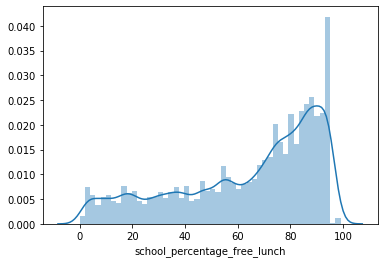

In [178]:
import seaborn as sns

sns.distplot(new_ca_projects['school_percentage_free_lunch'])

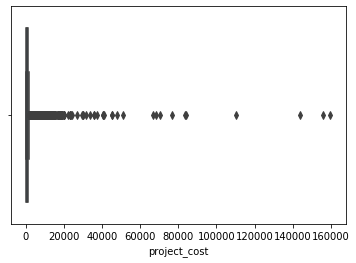

In [179]:
#sns.distplot(new_ca_projects['project_cost'])
ax = sns.boxplot(x=new_ca_projects["project_cost"])

In [180]:
high_cost_projects = new_ca_projects[(new_ca_projects['project_cost']>=600)]
low_cost_projects = new_ca_projects[(new_ca_projects['project_cost']<=600)]

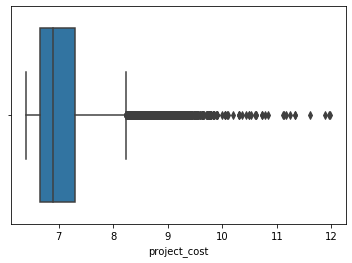

In [181]:
ax_high = sns.boxplot(x=np.log(high_cost_projects['project_cost'])) # look into syntax

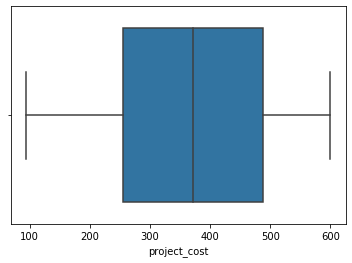

In [182]:
ax_low = sns.boxplot(x=low_cost_projects['project_cost'])

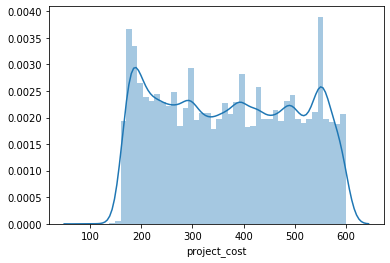

In [183]:
sns.distplot(low_cost_projects['project_cost'])

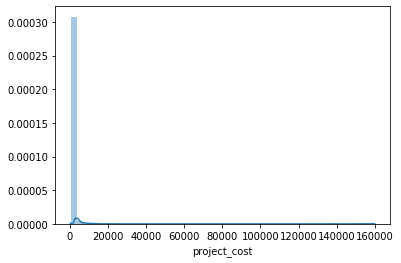

In [184]:
sns.distplot(high_cost_projects['project_cost'])

### Model-ready Dataframe:

In [119]:
ca_projects_model = new_ca_projects.drop(['project_type','project_subject_category_tree','project_grade_level_category','project_resource_category','project_current_status','teacher_prefix', 'donation_received_date','project_posted_date','project_expiration_date','school_metro_type'], axis=1)

In [120]:
ca_projects_model.head(3)

,project_id,max_donation_amount,total_donations,teacher_project_posted_sequence,project_cost,resource_unit_price,school_percentage_free_lunch,history_civics,project_status,literacy_language,math_science,health_sports,warmth,care_hunger,music_the_arts,special_needs,applied_learning,art_supplies,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_3-5,grades_6-8,grades_9-12,grades_prek-2,professional_development,student_led,teacher_led,female,male,neutral,days_to_first_donation,days_duration_campaign,month_project_posted
0,00005454366b6b914f9a8290f18f4aed,54.30,6,2,319.44,35.05,62.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,122,3
1,00006084c3d92d904a22e0a70f5c119a,182.38,6,41,364.76,32.81,95.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,17,122,7
2,0001037c9aa509b21c47ef94822ae9c1,180.85,8,1,490.85,349.95,92.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,2,117,1


In [121]:
ca_projects_model.to_csv('data/ca_projects_model.csv', encoding='utf-8', index=False)

## Repeat all for copy k-1 dummies:

In [122]:
#ca_projects_copy

ca_projects_copy.drop(['resource_vendor_name','resource_quantity','resource_item_name','project_title','donation_included_optional_donation','donor_cart_sequence','donor_state','donor_is_teacher'], axis=1, inplace=True)

ca_projects_copy['resource_unit_price'] = ca_projects_copy.apply(
    lambda row: row['project_cost'] if np.isnan(row['resource_unit_price']) and (row['project_resource_category']=='Trips') else row['resource_unit_price'],
    axis=1
)

ca_projects_copy['resource_unit_price'] = ca_projects_copy.apply(
    lambda row: row['project_cost'] if np.isnan(row['resource_unit_price']) and (row['project_resource_category']=='Visitors') else row['resource_unit_price'],
    axis=1
)


ca_projects_copy.dropna(subset=['resource_unit_price'],inplace=True)

ca_projects_copy["teacher_prefix"].fillna("Teacher", inplace = True)

ca_projects_copy['teacher_gender'] = ca_projects_copy['teacher_prefix'].replace(
    ['Ms.','Mrs.'],
    'female', 
    regex=True
).replace(['Mr.'],'male', regex = True
         ).replace(['Teacher','Dr.','Mx.'],'neutral',regex = True)

ca_projects_copy['school_percentage_free_lunch'].fillna((ca_projects_copy['school_percentage_free_lunch'].mean()), inplace=True)

ca_projects_copy = ca_projects_copy[ca_projects_copy.project_current_status != 'Live']

ca_projects_copy = ca_projects_copy[ca_projects_copy.project_grade_level_category != 'unknown']


In [123]:
ca_projects_copy.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,teacher_gender
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female


In [124]:
grade_array = ca_projects_copy['project_grade_level_category'].to_numpy()
grade_dummies2 = pd.get_dummies(pd.Series(grade_array), drop_first=True, dtype=int)
ca_projects_copy = pd.concat([ca_projects_copy, grade_dummies2], axis=1)
ca_projects_copy.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,teacher_gender,Grades 6-8,Grades 9-12,Grades PreK-2
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,1.0,0.0,0.0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,1.0,0.0,0.0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,1.0,0.0,0.0


In [125]:
type_array = ca_projects_copy['project_type'].to_numpy()
type_dummies2 = pd.get_dummies(pd.Series(type_array), drop_first=True, dtype=int)
ca_projects_copy = pd.concat([ca_projects_copy, type_dummies2], axis=1)
ca_projects_copy.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,teacher_gender,Grades 6-8,Grades 9-12,Grades PreK-2,Student-Led,Teacher-Led
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,1.0,0.0,0.0,0.0,1.0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,1.0,0.0,0.0,0.0,1.0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,1.0,0.0,0.0,0.0,1.0


In [126]:
gender_array = ca_projects_copy['teacher_gender'].to_numpy()
gender_dummies2 = pd.get_dummies(pd.Series(gender_array), drop_first=True, dtype=int)
ca_projects_copy = pd.concat([ca_projects_copy, gender_dummies2], axis=1)
ca_projects_copy.drop(['teacher_gender'], axis=1, inplace=True)
ca_projects_copy.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,Grades 6-8,Grades 9-12,Grades PreK-2,Student-Led,Teacher-Led,male,neutral
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [127]:
metro_array = ca_projects_copy['school_metro_type'].to_numpy()
metro_dummies2 = pd.get_dummies(pd.Series(metro_array), drop_first=True, dtype=int)
ca_projects_copy = pd.concat([ca_projects_copy, metro_dummies2], axis=1)

In [128]:
ca_projects_copy.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_type,project_subject_category_tree,project_subject_subcategory_tree,project_grade_level_category,project_resource_category,project_cost,project_posted_date,project_expiration_date,project_current_status,project_fully_funded_date,resource_unit_price,teacher_prefix,teacher_first_project_posted_date,school_metro_type,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,Grades 6-8,Grades 9-12,Grades PreK-2,Student-Led,Teacher-Led,male,neutral,suburban,town,unknown,urban
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31 20:36:03,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31 15:16:02,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01 12:38:47,1.0,Teacher-Led,Math & Science,Environmental Science,Grades 6-8,Supplies,1664.07,2017-07-30,2017-11-29,Fully Funded,2017-08-04,1147.5,Ms.,2017-07-30,unknown,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
ca_projects_copy.drop(['school_metro_type','project_type','project_subject_category_tree','project_subject_subcategory_tree','project_grade_level_category','project_resource_category','teacher_prefix'], axis=1, inplace=True)

In [130]:
from datetime import datetime

ca_projects_copy['donation_received_date'] = pd.to_datetime(ca_projects_copy['donation_received_date'])
ca_projects_copy['donation_received_date'] = pd.to_datetime(ca_projects_copy['donation_received_date'].dt.date)

ca_projects_copy['project_posted_date'] = pd.to_datetime(ca_projects_copy['project_posted_date'])
ca_projects_copy['project_posted_date'] = pd.to_datetime(ca_projects_copy['project_posted_date'].dt.date)

ca_projects_copy['project_expiration_date'] = pd.to_datetime(ca_projects_copy['project_expiration_date'])
ca_projects_copy['project_expiration_date'] = pd.to_datetime(ca_projects_copy['project_expiration_date'].dt.date)



In [131]:
ca_projects_copy.drop(['project_fully_funded_date'], axis=1, inplace=True)
ca_projects_copy['project_status'] = np.where((ca_projects_copy['project_current_status'] == 'Fully Funded'), 0, 1)

In [132]:
print(ca_projects_copy.columns)

Index(['project_id', 'donation_amount', 'donation_received_date',
       'teacher_project_posted_sequence', 'project_cost',
       'project_posted_date', 'project_expiration_date',
       'project_current_status', 'resource_unit_price',
       'teacher_first_project_posted_date', 'school_percentage_free_lunch',
       'care_hunger', 'health_sports', 'special_needs', 'math_science',
       'music_the_arts', 'literacy_language', 'applied_learning', 'warmth',
       'history_civics', 'books', 'classroom_basics', 'computers_tablets',
       'educational_kits_games', 'flexible_seating', 'food,_clothing_hygiene',
       'instructional_technology', 'lab_equipment', 'musical_instruments',
       'other', 'reading_nooks,_desks_storage', 'sports_exercise_equipment',
       'supplies', 'technology', 'trips', 'visitors', 'Grades 6-8',
       'Grades 9-12', 'Grades PreK-2', 'Student-Led', 'Teacher-Led', 'male',
       'neutral', 'suburban', 'town', 'unknown', 'urban', 'project_status'],
      dtype

In [133]:
ca_projects_copy.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_cost,project_posted_date,project_expiration_date,project_current_status,resource_unit_price,teacher_first_project_posted_date,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,Grades 6-8,Grades 9-12,Grades PreK-2,Student-Led,Teacher-Led,male,neutral,suburban,town,unknown,urban,project_status
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31,1.0,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,2017-07-30,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31,1.0,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,2017-07-30,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01,1.0,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,2017-07-30,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [134]:
ca_projects_copy.drop(['teacher_first_project_posted_date'], axis=1, inplace=True)

In [135]:
test_copy = ca_projects_copy.copy()

In [136]:
test_copy.columns = test_copy.columns.str.lower().str.replace(' & ', '_').str.replace(' ', '_').str.replace('-', '_')

In [137]:
test_copy.head(3)

,project_id,donation_amount,donation_received_date,teacher_project_posted_sequence,project_cost,project_posted_date,project_expiration_date,project_current_status,resource_unit_price,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_6_8,grades_9_12,grades_prek_2,student_led,teacher_led,male,neutral,suburban,town,unknown,urban,project_status
0,ad849da1614304ce018fbfff85f6ca87,50.0,2017-07-31,1.0,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,ad849da1614304ce018fbfff85f6ca87,30.0,2017-07-31,1.0,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,ad849da1614304ce018fbfff85f6ca87,100.0,2017-08-01,1.0,1664.07,2017-07-30,2017-11-29,Fully Funded,1147.5,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [138]:
ca_projects_copy.columns = ca_projects_copy.columns.str.lower().str.replace(' & ', '_').str.replace(' ', '_').str.replace('-', '_')
print(ca_projects_copy.columns)

Index(['project_id', 'donation_amount', 'donation_received_date',
       'teacher_project_posted_sequence', 'project_cost',
       'project_posted_date', 'project_expiration_date',
       'project_current_status', 'resource_unit_price',
       'school_percentage_free_lunch', 'care_hunger', 'health_sports',
       'special_needs', 'math_science', 'music_the_arts', 'literacy_language',
       'applied_learning', 'warmth', 'history_civics', 'books',
       'classroom_basics', 'computers_tablets', 'educational_kits_games',
       'flexible_seating', 'food,_clothing_hygiene',
       'instructional_technology', 'lab_equipment', 'musical_instruments',
       'other', 'reading_nooks,_desks_storage', 'sports_exercise_equipment',
       'supplies', 'technology', 'trips', 'visitors', 'grades_6_8',
       'grades_9_12', 'grades_prek_2', 'student_led', 'teacher_led', 'male',
       'neutral', 'suburban', 'town', 'unknown', 'urban', 'project_status'],
      dtype='object')


In [146]:
#df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

new_ca_projects_copy = ca_projects_copy.groupby('project_id').agg({
    'donation_amount':[max,len], 'donation_received_date':min,
'teacher_project_posted_sequence':max, 'project_cost':max,
'project_posted_date':max, 'project_expiration_date':max,
'resource_unit_price':max,'school_percentage_free_lunch':max, 
'care_hunger':max, 'health_sports':max,'special_needs':max, 
'math_science':max, 'music_the_arts':max, 'literacy_language':max,
'applied_learning':max, 'warmth':max, 'history_civics':max, 'books':max,
'classroom_basics':max, 'computers_tablets':max, 'educational_kits_games':max,
'flexible_seating':max, 'food,_clothing_hygiene':max,
'instructional_technology':max, 'lab_equipment':max, 'musical_instruments':max,
'other':max, 'reading_nooks,_desks_storage':max, 'sports_exercise_equipment':max,
'supplies':max, 'technology':max, 'trips':max, 'visitors':max, 'grades_6_8':max,
'grades_9_12':max, 'grades_prek_2':max, 'student_led':max, 'teacher_led':max, 'male':max,
'neutral':max, 'suburban':max, 'town':max, 'unknown':max, 'urban':max, 'project_status':max
                        }).reset_index()
    
    

In [148]:
new_ca_projects_copy.head(3)

project_id donation_amount       \
                                                max  len   
0  00005454366b6b914f9a8290f18f4aed           54.30  6.0   
1  00006084c3d92d904a22e0a70f5c119a          182.38  6.0   
2  0001037c9aa509b21c47ef94822ae9c1          180.85  8.0   

  donation_received_date teacher_project_posted_sequence project_cost  \
                     min                             max          max   
0             2018-03-31                             2.0       319.44   
1             2017-07-23                            41.0       364.76   
2             2015-01-14                             1.0       490.85   

  project_posted_date project_expiration_date resource_unit_price  \
                  max                     max                 max   
0          2018-03-30              2018-07-30               35.05   
1          2017-07-06              2017-11-05               32.81   
2          2015-01-12              2015-05-09              349.95   

  school_percentage_free_lunch care_hunger health_sports special_needs  \
                           max         max           max           max   
0                         62.0         0.0           0.0           0.0   
1                         95.0         1.0           0.0           0.0   
2                         92.0         0.0           0.0           0.0   

  math_science music_the_arts literacy_language applied_learning warmth  \
           max            max               max              max    max   
0          0.0            0.0               0.0              0.0    0.0   
1          0.0            0.0               0.0              0.0    1.0   
2          1.0            0.0               0.0              0.0    0.0   

  history_civics books classroom_basics computers_tablets  \
             max   max              max               max   
0            1.0   0.0              0.0               0.0   
1            0.0   0.0              0.0               0.0   
2            0.0   0.0              0.0               0.0   

  educational_kits_games flexible_seating food,_clothing_hygiene  \
                     max              max                    max   
0                    0.0              0.0                    0.0   
1                    0.0              0.0                    1.0   
2                    0.0              0.0                    0.0   

  instructional_technology lab_equipment musical_instruments other  \
                       max           max                 max   max   
0                      0.0           0.0                 0.0   0.0   
1                      0.0           0.0                 0.0   0.0   
2                      0.0           0.0                 0.0   0.0   

  reading_nooks,_desks_storage sports_exercise_equipment supplies technology  \
                           max                       max      max        max   
0                          0.0                       0.0      1.0        0.0   
1                          0.0                       0.0      0.0        0.0   
2                          0.0                       0.0      0.0        1.0   

  trips visitors grades_6_8 grades_9_12 grades_prek_2 student_led teacher_led  \
    max      max        max         max           max         max         max   
0   0.0      0.0        1.0         0.0           0.0         0.0         1.0   
1   0.0      0.0        0.0         1.0           0.0         0.0         1.0   
2   0.0      0.0        0.0         1.0           0.0         0.0         1.0   

  male neutral suburban town unknown urban project_status  
   max     max      max  max     max   max            max  
0  0.0     0.0      1.0  0.0     0.0   0.0              0  
1  0.0     0.0      0.0  0.0     0.0   1.0              0  
2  0.0     0.0      0.0  0.0     0.0   1.0              0

In [154]:
columns = list(new_ca_projects_copy.columns)
column_names = []
for i in columns:
    column_names.append(i[0])
    
print(column_names)

['project_id', 'donation_amount', 'donation_amount', 'donation_received_date', 'teacher_project_posted_sequence', 'project_cost', 'project_posted_date', 'project_expiration_date', 'resource_unit_price', 'school_percentage_free_lunch', 'care_hunger', 'health_sports', 'special_needs', 'math_science', 'music_the_arts', 'literacy_language', 'applied_learning', 'warmth', 'history_civics', 'books', 'classroom_basics', 'computers_tablets', 'educational_kits_games', 'flexible_seating', 'food,_clothing_hygiene', 'instructional_technology', 'lab_equipment', 'musical_instruments', 'other', 'reading_nooks,_desks_storage', 'sports_exercise_equipment', 'supplies', 'technology', 'trips', 'visitors', 'grades_6_8', 'grades_9_12', 'grades_prek_2', 'student_led', 'teacher_led', 'male', 'neutral', 'suburban', 'town', 'unknown', 'urban', 'project_status']


In [155]:
print(column_names.index("donation_amount"))

1


In [158]:
column_names[1] = "max_donation_amount" 
column_names[2] = "total_donations"

#new_ca_projects.columns = column_names

#new_ca_projects['total_donations'] = new_ca_projects['total_donations'].astype(int) # change dummies to int

In [161]:
print(len(column_names))
new_ca_projects_copy.columns = column_names


47


In [163]:
new_ca_projects_copy['days_to_first_donation'] = new_ca_projects_copy['donation_received_date'] - new_ca_projects_copy['project_posted_date'] 

new_ca_projects_copy['days_duration_campaign'] = new_ca_projects_copy['project_expiration_date'] - new_ca_projects_copy['project_posted_date'] 

new_ca_projects_copy['days_to_first_donation'] = new_ca_projects_copy['days_to_first_donation'].dt.days.astype('int16')
new_ca_projects_copy['days_duration_campaign'] = new_ca_projects_copy['days_duration_campaign'].dt.days.astype('int16')

new_ca_projects_copy['month_project_posted'] = pd.DatetimeIndex(new_ca_projects_copy['project_posted_date']).month

new_ca_projects_copy = new_ca_projects_copy.drop(new_ca_projects[(new_ca_projects_copy['days_to_first_donation']<0) | (new_ca_projects_copy['days_duration_campaign'] <0)].index)



/Users/pmoquette/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [164]:
filtered1 = new_ca_projects_copy.loc[new_ca_projects_copy['project_status']==1]
percentage_expired_projects = (len(filtered1)/len(new_ca_projects_copy))*100
print("The percentage of projects that did not meet their goal before the deadline is:", percentage_expired_projects,"%")

The percentage of projects that did not meet their goal before the deadline is: 15.855666294562187 %


In [165]:
new_ca_projects_copy.head(3)

,project_id,max_donation_amount,total_donations,donation_received_date,teacher_project_posted_sequence,project_cost,project_posted_date,project_expiration_date,resource_unit_price,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_6_8,grades_9_12,grades_prek_2,student_led,teacher_led,male,neutral,suburban,town,unknown,urban,project_status,days_to_first_donation,days_duration_campaign,month_project_posted
0,00005454366b6b914f9a8290f18f4aed,54.30,6.0,2018-03-31,2.0,319.44,2018-03-30,2018-07-30,35.05,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,122,3
1,00006084c3d92d904a22e0a70f5c119a,182.38,6.0,2017-07-23,41.0,364.76,2017-07-06,2017-11-05,32.81,95.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,17,122,7
2,0001037c9aa509b21c47ef94822ae9c1,180.85,8.0,2015-01-14,1.0,490.85,2015-01-12,2015-05-09,349.95,92.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2,117,1


In [166]:
new_ca_projects_copy.dtypes

project_id                                 object
max_donation_amount                       float64
total_donations                           float64
donation_received_date             datetime64[ns]
teacher_project_posted_sequence           float64
project_cost                              float64
project_posted_date                datetime64[ns]
project_expiration_date            datetime64[ns]
resource_unit_price                       float64
school_percentage_free_lunch              float64
care_hunger                               float64
health_sports                             float64
special_needs                             float64
math_science                              float64
music_the_arts                            float64
literacy_language                         float64
applied_learning                          float64
warmth                                    float64
history_civics                            float64
books                                     float64


In [169]:
null_cols = new_ca_projects_copy.isnull().sum()
null_cols[null_cols > 0] 

grades_6_8       1487
grades_9_12      1487
grades_prek_2    1487
student_led        38
teacher_led        38
male                3
neutral             3
suburban            3
town                3
unknown             3
urban               3
dtype: int64

In [172]:
new_ca_projects_copy.dropna(inplace=True)

In [173]:
null_cols = new_ca_projects_copy.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [174]:
for col in ['care_hunger','health_sports','special_needs','math_science','music_the_arts','literacy_language','applied_learning','warmth','history_civics','books','classroom_basics','computers_tablets','educational_kits_games','flexible_seating','food,_clothing_hygiene','instructional_technology','lab_equipment','musical_instruments','other','reading_nooks,_desks_storage','sports_exercise_equipment','supplies','technology','trips','visitors','grades_6_8','grades_9_12','grades_prek_2','student_led','teacher_led','male','neutral','suburban','town','unknown','urban']:
    new_ca_projects_copy[col] = new_ca_projects_copy[col].astype(int)

In [175]:
new_ca_projects_copy.head()

,project_id,max_donation_amount,total_donations,donation_received_date,teacher_project_posted_sequence,project_cost,project_posted_date,project_expiration_date,resource_unit_price,school_percentage_free_lunch,care_hunger,health_sports,special_needs,math_science,music_the_arts,literacy_language,applied_learning,warmth,history_civics,books,classroom_basics,computers_tablets,educational_kits_games,flexible_seating,"food,_clothing_hygiene",instructional_technology,lab_equipment,musical_instruments,other,"reading_nooks,_desks_storage",sports_exercise_equipment,supplies,technology,trips,visitors,grades_6_8,grades_9_12,grades_prek_2,student_led,teacher_led,male,neutral,suburban,town,unknown,urban,project_status,days_to_first_donation,days_duration_campaign,month_project_posted
0,00005454366b6b914f9a8290f18f4aed,54.30,6.0,2018-03-31,2.0,319.44,2018-03-30,2018-07-30,35.05,62.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,122,3
1,00006084c3d92d904a22e0a70f5c119a,182.38,6.0,2017-07-23,41.0,364.76,2017-07-06,2017-11-05,32.81,95.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,17,122,7
2,0001037c9aa509b21c47ef94822ae9c1,180.85,8.0,2015-01-14,1.0,490.85,2015-01-12,2015-05-09,349.95,92.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,2,117,1
3,000109232e37607c2de30ac1e103fa22,200.00,2.0,2017-12-20,4.0,294.93,2017-12-06,2018-04-06,39.89,92.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,14,121,12
4,000150db429aff026ecd130b0a076cef,268.67,1.0,2015-01-27,18.0,278.15,2015-01-11,2015-05-08,5.83,95.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,16,117,1


In [176]:
filtered1 = new_ca_projects_copy.loc[new_ca_projects_copy['project_status']==1]
percentage_expired_projects = (len(filtered1)/len(new_ca_projects_copy))*100
print("The percentage of projects that did not meet their goal before the deadline is:", percentage_expired_projects,"%")

The percentage of projects that did not meet their goal before the deadline is: 15.802649760221085 %


In [177]:
new_ca_projects_copy.to_csv('data/ca_projects_model_k1.csv', encoding='utf-8', index=False)